In [ ]:
from google.colab import drive
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from tensorflow.keras.models import Sequential, Model
import numpy as np
import pandas as pd
import os
import tensorflow.keras.backend as K
from sklearn.metrics import *
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Загрузка датасета по частям с дальнейшей конкатенацией. 
df=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-14-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])#,nrows = 50000
df2=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-15-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
df = pd.concat([df,df2])
del df2
#df3=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-16-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df3])
#del df3
#df4=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-20-2018.csv")
#df= pd.concat([df,df4])
#del df4
df5=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-21-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
df = pd.concat([df,df5])
del df5
df6=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-22-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
df = pd.concat([df,df6])
del df6
#df7=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-23-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df7])
#del df7
#df8=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-28-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df8])
#del df8
#df9=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/03-01-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df9])
#del df9
df10=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/03-02-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
df = pd.concat([df,df10])
del df10
#df11=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-28-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df11])
#del df11
#df12=pd.read_csv("/content/drive/MyDrive/CICIDS2017/CSE-CIC-IDS2018/02-28-2018.csv", usecols = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label'])
#df = pd.concat([df,df12])
#del df12

#Вывод уникальных признаков типов аттак или benign для каждого датасета. Ожидается DDoS, DoS Types и т.д.
#print (df1[' Label'].unique())
#print (df2[' Label'].unique())
#print (df3[' Label'].unique())
#print (df4[' Label'].unique())
#print (df5[' Label'].unique())
#print (df6[' Label'].unique())
#print (df7[' Label'].unique())
#print (df8[' Label'].unique())
#print (df9[' Label'].unique())
#print (df10[' Label'].unique())
#print (df11[' Label'].unique())
#print (df12[' Label'].unique(), "\n")

#Конкатенация и общая информация о наборе данных

print (df['Label'].unique(), "\n")








data = df.copy() #Датафрейм копируем в дату для дальнейших операций
del df
data.info()

['Benign' 'FTP-BruteForce' 'SSH-Bruteforce' 'DoS attacks-GoldenEye'
 'DoS attacks-Slowloris' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC'
 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection' 'Bot'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242875 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TotLen Fwd Pkts    int64  
 1   Bwd Pkt Len Min    int64  
 2   Flow IAT Mean      float64
 3   Flow IAT Std       float64
 4   Flow IAT Min       float64
 5   Fwd IAT Mean       float64
 6   Fwd IAT Std        float64
 7   Fwd IAT Min        float64
 8   Bwd IAT Mean       float64
 9   Bwd IAT Std        float64
 10  Bwd IAT Max        float64
 11  Bwd IAT Min        float64
 12  Fwd PSH Flags      int64  
 13  Pkt Len Var        float64
 14  SYN Flag Cnt       int64  
 15  PSH Flag Cnt       int64  
 16  Subflow Fwd Byts   int64  
 17  Init Fwd Win Byts  int64  
 18  Fwd Seg Size Min   int64  
 19  Active Mean

In [ ]:
import gc
gc.collect()
df=pd.DataFrame()

In [ ]:
deleteCol = []
for column in data.columns:
    if data[column].isnull().values.any():
        deleteCol.append(column)
for column in deleteCol:
    data.drop([column],axis=1,inplace=True)

deleteCol = []
for column in data.columns:
    if column == 'Label':
        continue
    elif data[column].dtype==np.object:
        deleteCol.append(column)
for column in deleteCol:
    data.drop(column,axis=1,inplace=True)

<ipython-input-5-36a0b25e567e>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif data[column].dtype==np.object:


In [ ]:
for column in data.columns:
    if data[column].dtype == np.int64:
        maxVal = data[column].max()
        if maxVal < 120:
            data[column] = data[column].astype(np.int8)
        elif maxVal < 32767:
            data[column] = data[column].astype(np.int16)
        else:
            data[column] = data[column].astype(np.int32)
            
    if data[column].dtype == np.float64:
        maxVal = data[column].max()
        minVal = data[data[column]>0][column]
        if maxVal < 120 and minVal>0.01 :
            data[column] = data[column].astype(np.float16)
        else:
            data[column] = data[column].astype(np.float32)

In [ ]:
# Проверим количество потерянных значений в датасете
print(f"Missing values: {data.isnull().sum().sum()}", "\n")
#Проверим датасет на бесконечные значения. Заменим их на NaN, так как их потом просто удалить.
data.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"Missing values: {data.isnull().sum().sum()}", "\n")

Missing values: 0 

Missing values: 0 



In [ ]:
data['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'Bot'], dtype=object)

In [ ]:
data['Label'].value_counts()

Benign                   3835133
DDOS attack-HOIC          686012
Bot                       286191
FTP-BruteForce            193360
SSH-Bruteforce            187589
DoS attacks-GoldenEye      41508
DoS attacks-Slowloris      10990
DDOS attack-LOIC-UDP        1730
Brute Force -Web             249
Brute Force -XSS              79
SQL Injection                 34
Name: Label, dtype: int64

In [ ]:
data = data[data['Label'] != 'DDOS attack-LOIC-UDP']
data = data[data['Label'] != 'DDOS attack-HOIC']
data = data[data['Label'] != 'SSH-Bruteforce']
#data = data[data['Label'] != 'FTP-BruteForce']
#data = data[data['Label'] != 'Brute Force -Web']
#data = data[data['Label'] != 'Brute Force -XSS']

In [ ]:
new_order = ['Pkt Len Var', 'Active Min', 'Fwd IAT Std', 'Active Mean', 'Active Max', 'Fwd Seg Size Min', 'Flow IAT Std', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 'Bwd IAT Min', 'Active Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'SYN Flag Cnt', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Min', 'Fwd IAT Min', 'Label']
data = data.reindex(columns=new_order)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4367544 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Pkt Len Var        float32
 1   Active Min         float32
 2   Fwd IAT Std        float32
 3   Active Mean        float32
 4   Active Max         float32
 5   Fwd Seg Size Min   int8   
 6   Flow IAT Std       float32
 7   Bwd IAT Mean       float32
 8   PSH Flag Cnt       int8   
 9   Flow IAT Mean      float32
 10  TotLen Fwd Pkts    int32  
 11  Subflow Fwd Byts   int32  
 12  Bwd IAT Min        float32
 13  Active Std         float32
 14  Bwd IAT Max        float32
 15  Fwd PSH Flags      int8   
 16  SYN Flag Cnt       int8   
 17  Fwd IAT Mean       float32
 18  Bwd IAT Std        float32
 19  Flow IAT Min       float32
 20  Init Fwd Win Byts  int32  
 21  Bwd Pkt Len Min    int16  
 22  Fwd IAT Min        float32
 23  Label              object 
dtypes: float32(15), int16(1), int32(3), int8(4), objec

In [ ]:
buyback = data.copy()

In [ ]:
data['Label'].value_counts()

Benign                   3835133
Bot                       286191
FTP-BruteForce            193360
DoS attacks-GoldenEye      41508
DoS attacks-Slowloris      10990
Brute Force -Web             249
Brute Force -XSS              79
SQL Injection                 34
Name: Label, dtype: int64

#Тест LSTM

In [ ]:
data.replace('DoS attacks-GoldenEye', 'Attack', inplace=True)
data.replace('DoS attacks-Slowloris', 'Attack', inplace=True)
data.replace('Brute Force -Web', 'Attack', inplace=True)
data.replace('Brute Force -XSS', 'Attack', inplace=True)
data.replace('SQL Injection', 'Attack', inplace=True)
data.replace('Bot', 'Attack', inplace=True)
data.replace('FTP-BruteForce', 'Attack', inplace=True)

In [ ]:
data['Label'].value_counts()

Benign    3835133
Attack     532411
Name: Label, dtype: int64

In [ ]:
y = data['Label']
X = data.drop(['Label'], axis=1)
#del data

In [ ]:
y.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(np.nan_to_num(X).astype(float))
X = scaler.transform(np.nan_to_num(X).astype(float))
print(X.shape)

(4367544, 23)


In [ ]:
y.replace('Attack', 1, inplace=True)
y.replace('Benign', 0, inplace=True)

In [ ]:
lstm = pickle.load(open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/lstm-5-13/lstm_5hidden13neurons2.pkl', 'rb'))

In [ ]:
y_pred1 = lstm.predict(X, batch_size=256)

17061/17061 [==============================] - 732s 43ms/step


In [ ]:
import gc
gc.collect()

0

In [ ]:
y_pred = np.argmax(y_pred1, axis=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Benign', 'Attack']
print('==============================Classification Report==============================')
print(classification_report(y, y_pred, target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
sum = tn + fp + fn + tp
print('Confussion Matrix:', "\n", confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
recall = tp / (tp + fn)
print('recall:', recall)
precision = tp / (tp + fp)
print('precision:', precision)
print('f1 score:', 2 * (precision * recall) / (precision + recall))
print('ROC AUC:', roc_auc_score(y, y_pred))
unique, counts = np.unique(y_pred, return_counts=True)
count_list = dict(zip(unique, counts))
print('Alghorythm marked', count_list[1], 'as attack and', count_list[0], "packets as benign")

==============================Classification Report==============================
              precision    recall  f1-score   support

      Benign       0.96      0.91      0.93   3835133
      Attack       0.51      0.70      0.59    532411

    accuracy                           0.88   4367544
   macro avg       0.74      0.80      0.76   4367544
weighted avg       0.90      0.88      0.89   4367544

==============================Confussion Matrix and metrics==============================
Confussion Matrix: 
 [[3482282  352851]
 [ 159372  373039]]
Accuracy:  0.8827205862150445
recall: 0.7006598285910697
precision: 0.5139056881896706
f1 score: 0.5929249042955541
ROC AUC: 0.8043274679657725
Alghorythm marked 725890 as attack and 3641654 packets as benign


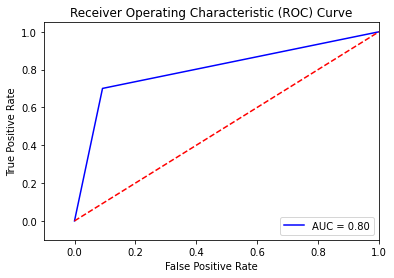

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#Дообучение LSTM

In [ ]:
lstm = pickle.load(open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/lstm-5-13/lstm_5hidden13neurons2_plusfit.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-03-19 12:27:26       184336
config.json                                    2023-03-19 12:27:26         6050
metadata.json                                  2023-03-19 12:27:26           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......flatten
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_3
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_4
.........cell
............vars
...............

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


In [ ]:
lstm.fit(X_train, to_categorical(y_train), epochs=1, batch_size=256, verbose=1)

8531/8531 [==============================] - 900s 104ms/step - loss: 0.1158 - accuracy: 0.9549


In [ ]:
gc.collect()

12856

In [ ]:
y_pred1 = lstm.predict(X_test, batch_size=256)
y_pred = np.argmax(y_pred1, axis=1)

8531/8531 [==============================] - 330s 38ms/step


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Benign', 'Attack']
print('==============================Classification Report==============================')
print(classification_report(y_test, y_pred, target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sum = tn + fp + fn + tp
print('Confussion Matrix:', "\n", confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
recall = tp / (tp + fn)
print('recall:', recall)
precision = tp / (tp + fp)
print('precision:', precision)
print('f1 score:', 2 * (precision * recall) / (precision + recall))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
unique, counts = np.unique(y_pred, return_counts=True)
count_list = dict(zip(unique, counts))
print('Alghorythm marked', count_list[1], 'as attack and', count_list[0], "packets as benign")

==============================Classification Report==============================
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98   1917483
      Attack       0.97      0.70      0.81    266289

    accuracy                           0.96   2183772
   macro avg       0.96      0.85      0.90   2183772
weighted avg       0.96      0.96      0.96   2183772

==============================Confussion Matrix and metrics==============================
Confussion Matrix: 
 [[1910877    6606]
 [  79633  186656]]
Accuracy:  0.9605091557177214
recall: 0.7009527242957839
precision: 0.965818422659395
f1 score: 0.8123407412887798
ROC AUC: 0.8487537914653879
Alghorythm marked 193262 as attack and 1990510 packets as benign


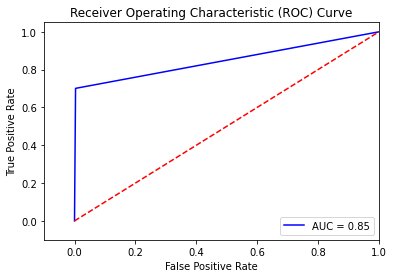

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
pickle.dump(lstm, open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/lstm-5-13/lstm_5hidden13neurons2_plusfit.pkl', "wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......flatten
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_3
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_4
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_5
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10


#Мультикласс

In [ ]:
#knn = pickle.load(open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/KNN-BallTree-Manhattan/1KBM.pkl', 'rb'))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:295: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  def __setstate__(self, state):


In [ ]:
CNN = pickle.load(open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/CNN/2(2con1pool)1Flat2DenseDense Filters32-64 300ep.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-03-08 22:33:58       524632
config.json                                    2023-03-08 22:33:58         4138
metadata.json                                  2023-03-08 22:33:58           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv1d_2
.........vars
............0
............1
......conv1d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
......max_pooling1d
.........vars
......max_pooling1d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimi

In [ ]:
datam = buyback.copy()

In [ ]:
datam = data[data.Label != "Benign"] 

In [ ]:
datam['Label'].value_counts()

Bot                      286191
FTP-BruteForce           193360
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Brute Force -Web            249
Brute Force -XSS             79
SQL Injection                34
Name: Label, dtype: int64

In [ ]:
datam.replace('DoS attacks-GoldenEye', 2, inplace=True) 
datam.replace('DoS attacks-Slowloris', 5, inplace=True) 
datam.replace('Bot', 0, inplace=True) 
datam.replace('Brute Force -Web', 11, inplace=True) 
datam.replace('Brute Force -XSS', 13, inplace=True) 
datam.replace('SQL Injection', 12, inplace=True) 
datam.replace('FTP-BruteForce', 6, inplace=True) #(FTP-Patator)
targetm = datam['Label']
datam = datam.drop("Label", axis=1)

print(datam.head(1))

    Pkt Len Var  Active Min  Fwd IAT Std  Active Mean  Active Max  \
94          0.0         0.0          0.0          0.0         0.0   

    Fwd Seg Size Min  Flow IAT Std  Bwd IAT Mean  PSH Flag Cnt  Flow IAT Mean  \
94                40           0.0           0.0             1           19.0   

    TotLen Fwd Pkts  Subflow Fwd Byts  Bwd IAT Min  Active Std  Bwd IAT Max  \
94                0                 0          0.0         0.0          0.0   

    Fwd PSH Flags  SYN Flag Cnt  Fwd IAT Mean  Bwd IAT Std  Flow IAT Min  \
94              0             0           0.0          0.0          19.0   

    Init Fwd Win Byts  Bwd Pkt Len Min  Fwd IAT Min  
94              26883                0          0.0  


<ipython-input-19-070251ccca96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datam.replace('DoS attacks-GoldenEye', 2, inplace=True)
<ipython-input-19-070251ccca96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datam.replace('DoS attacks-Slowloris', 5, inplace=True)
<ipython-input-19-070251ccca96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datam.replace('Bot', 0, inplace=True)
<ipython-input-19-070251ccca96>:4: SettingWith

In [ ]:
datam = np.array(datam)
targetm = np.array(targetm)
print(datam.shape, targetm.shape)

(532411, 23) (532411,)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(np.nan_to_num(datam).astype(float))
datam = scaler.transform(np.nan_to_num(datam).astype(float))
print(datam.shape)
datam = datam.reshape(datam.shape[0], datam.shape[1], 1)
print(datam.shape)

(532411, 23)
(532411, 23, 1)


In [ ]:
#datam = datam.reshape(7790629,23)
y_pred1 = CNN.predict(datam)

16638/16638 [==============================] - 51s 3ms/step


In [ ]:
y_pred = np.argmax(y_pred1, axis=1)

In [ ]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

    #compute average roc auc score in dict roc_auc_dict
    res = 0
    for val in roc_auc_dict.values():
        res += val
    
    res = res / len(roc_auc_dict)

  return res, roc_auc_dict

In [ ]:
#target_names = []
#target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
#print(classification_report(targetm, y_pred, target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
print('recall:', recall_score(targetm, y_pred, average='macro'))
print('precision:', precision_score(targetm, y_pred, average='macro'))
print('accuracy:', accuracy_score(targetm, y_pred))
print('f1 score:', f1_score(targetm, y_pred, average='macro'))
#print('ROC AUC for each class:',  roc_auc_score(y_test, y_pred, average = 'macro', multi_class = 'ovo'))
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

==============================Classification Report==============================
==============================Confussion Matrix and metrics==============================
recall: 0.05200766283024616


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.09510851941383598
accuracy: 0.026930322626692538
f1 score: 0.05097624971006736
ROC AUC AVG(Classes): (0.5017783784283079, {0: 0.3350314736175744, 2: 0.3361956332521313, 5: 0.6168603811102542, 6: 0.7696718192838246, 11: 0.5249056063173926, 12: 0.4078034484408385, 13: 0.5219802869761395})
Confussion Matrix: 
 [[    18    214      9     36      7   4166      0      0      0     26
  143658      6      0 138051]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [   253      0   9146    943   3421   9380     12      0      4      0
    1848   1091      0  15410]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [    65      0      0      0   4780   5169    821      0      0     23
     128      0      0      4]
 [     0      0      0      0      0      0      0      0   

In [ ]:
#?????????????????
#y_pred = np.append(y_pred, [7])
#targetm = np.append(targetm, [7])

In [ ]:
def roc_auc_score_multiclass2(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

    #compute average roc auc score in dict roc_auc_dict
    res = 0
    for val in roc_auc_dict.values():
        res += val
    
    res = res / len(roc_auc_dict)

  return res, roc_auc_dict

#ff = roc_auc_score_multiclass(y_test, y_pred)
#print(ff)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
print(classification_report(targetm, y_pred, labels=[0, 2, 5, 11, 13, 12], target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass2(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
#print(classification_report(targetm, y_pred, labels=[0, 2, 5, 11, 13, 12], target_names=target_names))
print(classification_report(targetm, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass2(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

==============================Classification Report==============================


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

                            precision    recall  f1-score   support

                       Bot       0.05      0.00      0.00    286191
                      DDoS       0.00      0.00      0.00         0
             DoS GoldenEye       1.00      0.22      0.36     41508
                  DoS Hulk       0.00      0.00      0.00         0
          DoS Slowhttptest       0.00      0.00      0.00         0
             DoS slowloris       0.28      0.47      0.35     10990
               FTP-Patator       0.00      0.00      0.00    193360
                Heartbleed       0.00      0.00      0.00         0
              Infiltration       0.00      0.00      0.00         0
                  PortScan       0.00      0.00      0.00         0
               SSH-Patator       0.00      0.00      0.00         0
  Web Attack � Brute Force       0.00      0.01      0.00       249
Web Attack � Sql Injection       0.00      0.00      0.00        34
          Web Attack � XSS       0.00      0.03

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.p

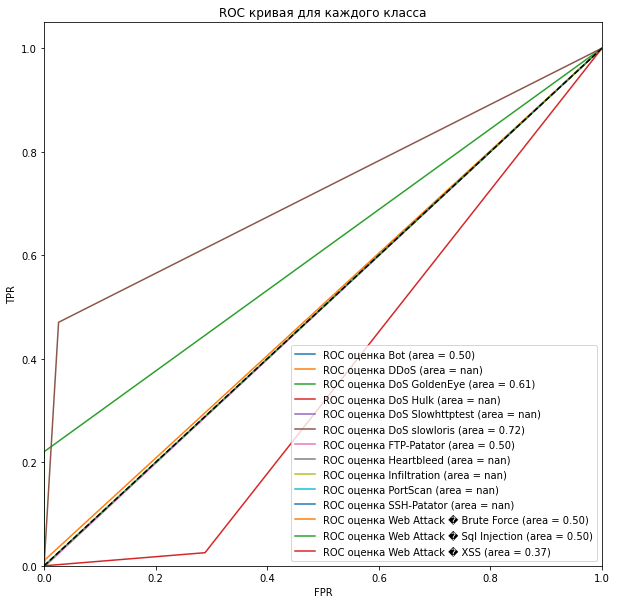

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 14

# assuming y_true and y_pred are numpy arrays of integer labels
fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(n_classes):
    y_test_class = (targetm == i).astype(int)
    y_pred_class = (y_pred == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_class, y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10,10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC оценка {0} (area = {1:0.2f})'.format(target_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая для каждого класса')
plt.legend(loc="lower right")
plt.show()

#Дообучение CNN

In [ ]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(datam, targetm, test_size=0.5, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 143077, 6: 96724, 2: 20722, 5: 5505, 11: 120, 13: 40, 12: 17})
Counter({0: 143114, 6: 96636, 2: 20786, 5: 5485, 11: 129, 13: 39, 12: 17})


In [ ]:
cnn_history = CNN.fit(X_train, to_categorical(y_train), epochs=4, batch_size=256, verbose=1)

Epoch 1/4
1040/1040 [==============================] - 41s 37ms/step - loss: 0.1005 - accuracy: 0.9941
Epoch 2/4
1040/1040 [==============================] - 31s 30ms/step - loss: 0.0052 - accuracy: 0.9994
Epoch 3/4
1040/1040 [==============================] - 33s 32ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 4/4
1040/1040 [==============================] - 27s 26ms/step - loss: 0.0051 - accuracy: 0.9994


In [ ]:
pickle.dump(CNN, open('/content/drive/MyDrive/CICIDS2017/2022. Подключение к СИАСТ/End/Settings test ipynbs/CNN/2(2con1pool)1Flat2DenseDense Filters32-64 300ep_plusfit.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv1d_2
.........vars
............0
............1
......conv1d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
......max_pooling1d
.........vars
......max_pooling1d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Nam

In [ ]:
y_pred1 = CNN.predict(datam)

16638/16638 [==============================] - 55s 3ms/step


In [ ]:
y_pred = np.argmax(y_pred1, axis=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
print(classification_report(targetm, y_pred, labels=[0, 2, 5, 11, 13, 12], target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass2(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

==============================Classification Report==============================


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 6, does not match size of target_names, 14
  warnings.warn(


                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00    286191
                      DDoS       1.00      1.00      1.00     41508
             DoS GoldenEye       1.00      0.99      0.99     10990
                  DoS Hulk       0.94      0.41      0.58       249
          DoS Slowhttptest       1.00      0.47      0.64        79
             DoS slowloris       0.32      0.59      0.41        34

                 micro avg       1.00      1.00      1.00    339051
                 macro avg       0.88      0.74      0.77    339051
              weighted avg       1.00      1.00      1.00    339051

==============================Confussion Matrix and metrics==============================
ROC AUC AVG(Classes): (0.8897357757514575, {0: 0.9994221001470321, 2: 0.9995963750807723, 5: 0.994055805843051, 6: 1.0, 11: 0.7068216718558495, 12: 0.7940772621436225, 13: 0.7341772151898734})
Confussion Matrix: 
 [[286188     

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
print(classification_report(targetm, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass2(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

==============================Classification Report==============================


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00    286191
                      DDoS       0.00      0.00      0.00         0
             DoS GoldenEye       1.00      1.00      1.00     41508
                  DoS Hulk       0.00      0.00      0.00         0
          DoS Slowhttptest       0.00      0.00      0.00         0
             DoS slowloris       1.00      0.99      0.99     10990
               FTP-Patator       1.00      1.00      1.00    193360
                Heartbleed       0.00      0.00      0.00         0
              Infiltration       0.00      0.00      0.00         0
                  PortScan       0.00      0.00      0.00         0
               SSH-Patator       0.00      0.00      0.00         0
  Web Attack � Brute Force       0.94      0.41      0.58       249
Web Attack � Sql Injection       0.32      0.59      0.41        34
          Web Attack � XSS       1.00      0.47

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS']
print('==============================Classification Report==============================')
print(classification_report(targetm, y_pred, labels=[0, 2, 5, 11, 13, 12], target_names=target_names))
print('==============================Confussion Matrix and metrics==============================')
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('ROC AUC AVG(Classes):', roc_auc_score_multiclass2(targetm, y_pred))
print('Confussion Matrix:', "\n", confusion_matrix(targetm, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.p

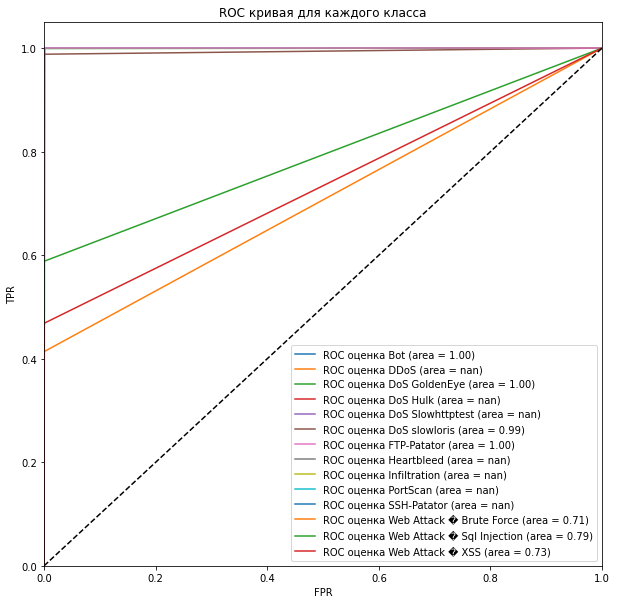

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 14

# assuming y_true and y_pred are numpy arrays of integer labels
fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(n_classes):
    y_test_class = (targetm == i).astype(int)
    y_pred_class = (y_pred == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_class, y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10,10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC оценка {0} (area = {1:0.2f})'.format(target_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая для каждого класса')
plt.legend(loc="lower right")
plt.show()